In [45]:
import numpy
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [46]:
DF= pd.read_csv('iris.csv')
DF.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
DF.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
DF['species'].value_counts

<bound method IndexOpsMixin.value_counts of 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object>

In [50]:
DF.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

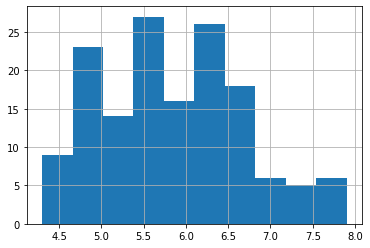

In [51]:
DF['sepal_length'].hist()

<AxesSubplot:>

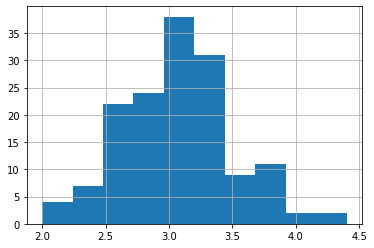

In [52]:
DF['sepal_width'].hist()

<AxesSubplot:>

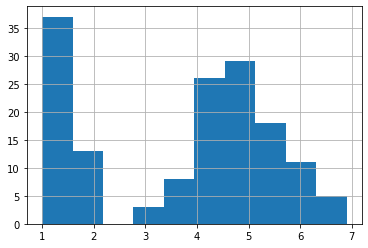

In [53]:
DF['petal_length'].hist()

<AxesSubplot:>

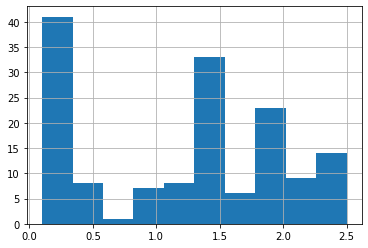

In [54]:
DF['petal_width'].hist()

In [55]:
colors=['red','orange','blue']
species=['virginica','setosa','versicolor']

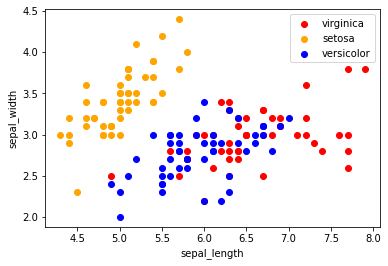

In [56]:
import matplotlib.pyplot as plt

for i in range(3):
    # Filter data on each class
    x = DF[DF['species'] == species[i]]
    
    # Plot the scatter plot
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()
plt.show()

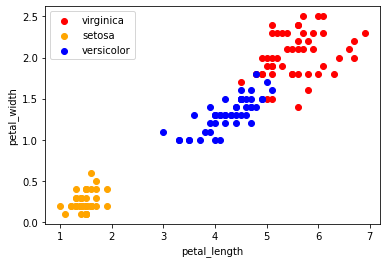

In [57]:
for i in range(3):  
    x = DF[DF['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()
plt.show()

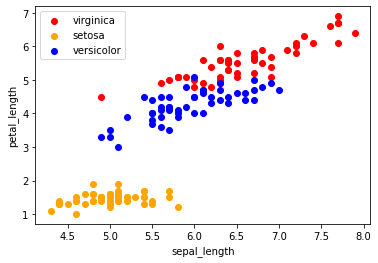

In [58]:
for i in range(3):  
    x = DF[DF['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])

plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()
plt.show()

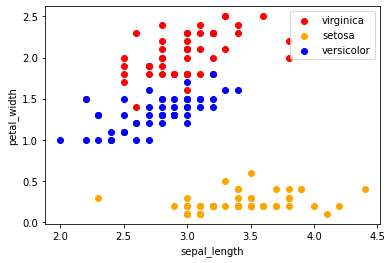

In [59]:
for i in range(3):  
    x = DF[DF['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel("sepal_length")
plt.ylabel("petal_width")
plt.legend()
plt.show()

In [60]:
DF.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

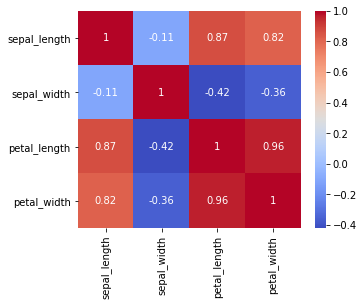

In [61]:
corr = DF.corr()
# Plot the heat map
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm")

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
import pickle
# input data
X = DF.drop(columns=['species']) 
#output data 
Y = DF[ 'species'] 
#split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [63]:
# Logistic Regression 
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test, y_test)* 100)

Logistic Regression Accuracy:  91.11111111111111


In [64]:
model.fit(x_train.values, y_train.values)

LogisticRegression(solver='liblinear')

In [65]:
#print metric to get performance 
print("Accuracy: ",model.score(x_test, y_test) *100)

Accuracy:  91.11111111111111


In [66]:
 #K-nearest neighbors 
model=KNeighborsClassifier() 
model.fit(x_train.values, y_train.values)
print("K-nearest neighbors Accuracy: ", model.score(x_test, y_test) * 100)

K-nearest neighbors Accuracy:  97.77777777777777


In [67]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [68]:
#print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [69]:
#Decision Tree 
model=DecisionTreeClassifier() 
model.fit(x_train.values, y_train.values) 
print("Decision Tree Accuracy: ", model.score(x_test, y_test) * 100)

Decision Tree Accuracy:  95.55555555555556


In [70]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [71]:
#print metric to get performance
print("Accuracy:",model.score(x_test, y_test) * 100)

Accuracy: 95.55555555555556


In [72]:
 #save the model 
import pickle 
filename ='saved_model.sav' 
pickle.dump(model, open(filename, 'wb')) 

In [73]:
 #Save the updated model 
filename ='saved_model.sav' 
try:
    with open(filename, 'wb') as file: 
        pickle.dump(model, file)
        print("Model saved successfully.") 
except Exception as e:
            print("Error saving the model: {e}") 
  
    

Model saved successfully.


In [74]:
 load_model= pickle.load(open(filename, 'rb')) 
        

In [75]:
 load_model.predict([[6.0, 2.2, 4.0, 1.0]])  
            

array(['versicolor'], dtype=object)

In [81]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
137,6.4,3.1,5.5,1.8
83,6.0,2.7,5.1,1.6
34,4.9,3.1,1.5,0.1
68,6.2,2.2,4.5,1.5
126,6.2,2.8,4.8,1.8


In [82]:
 load_model.predict([[5,3,4,1]])  

array(['versicolor'], dtype=object)